#EDA assignment_1

In [ ]:
# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.
# The wine quality dataset typically includes features such as:

# Fixed acidity
# Volatile acidity
# Citric acid
# Residual sugar
# Chlorides
# Free sulfur dioxide
# Total sulfur dioxide
# Density
# pH
# Sulphates
# Alcohol
# Quality (target variable)
# Importance:

# Fixed acidity: Influences the perceived acidity in wine.
# Volatile acidity: High levels can lead to an unpleasant, vinegar-like taste.
# Citric acid: Adds freshness and flavor.
# Residual sugar: Contributes to sweetness perception.
# Chlorides: Excessive levels can impart a salty taste.
# Sulfur dioxide: Acts as a preservative; excessive levels can affect taste.
# Density: Related to alcohol content and sweetness.
# pH: Influences wine stability and taste.
# Sulphates: Affects wine aroma and preservation.
# Alcohol: Higher alcohol content can influence wine body and taste.
# Quality: Target variable indicating the perceived quality of wine.

In [ ]:
# Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.
# Handling Missing Data:

# Dropna: Drop rows or columns with missing values.
# Mean/Median/Mode Imputation: Fill missing values with mean, median, or mode of the column.
# Prediction Models: Use predictive models to estimate missing values.
# Forward/Backward Fill: Use the previous or next valid observation to fill missing values.
# Advantages and Disadvantages:

# Dropna: Simple; reduces dataset size. Disadvantageous if too much data is lost.
# Mean/Median/Mode: Preserves data structure; sensitive to outliers.
# Prediction Models: Accurate if relationships are well-captured; computationally expensive.
# Forward/Backward Fill: Simple and preserves temporal order; may not be suitable for all data types.

In [ ]:
# Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?
# Key Factors:

# Study time
# Attendance
# Prior academic performance
# Socio-economic background
# Teaching quality
# Statistical Techniques:

# Correlation Analysis: Measure relationships between variables.
# Regression Analysis: Identify predictors of exam performance.
# ANOVA: Compare means across different groups.
# Factor Analysis: Identify underlying factors influencing performance.
# Machine Learning: Predict exam outcomes based on features.

In [ ]:
# Q4. Describe the process of feature engineering in the context of the student performance dataset. How did you select and transform the variables for your model?
# Feature Engineering Process:

# Feature Selection: Identify relevant variables (e.g., study time, attendance).
# Imputation: Handle missing data appropriately (e.g., mean imputation for missing attendance records).
# Encoding: Convert categorical variables into numerical form (e.g., one-hot encoding for socio-economic background).
# Scaling: Normalize or standardize numerical features (e.g., Min-Max scaling for study time).
# Creation of New Features: Derive new features if beneficial (e.g., total study hours per week from study time per day).
# Transformation:

# Selection: Based on domain knowledge and statistical tests (e.g., correlation with exam scores).
# Engineering: Modify features to improve model performance and interpretability.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

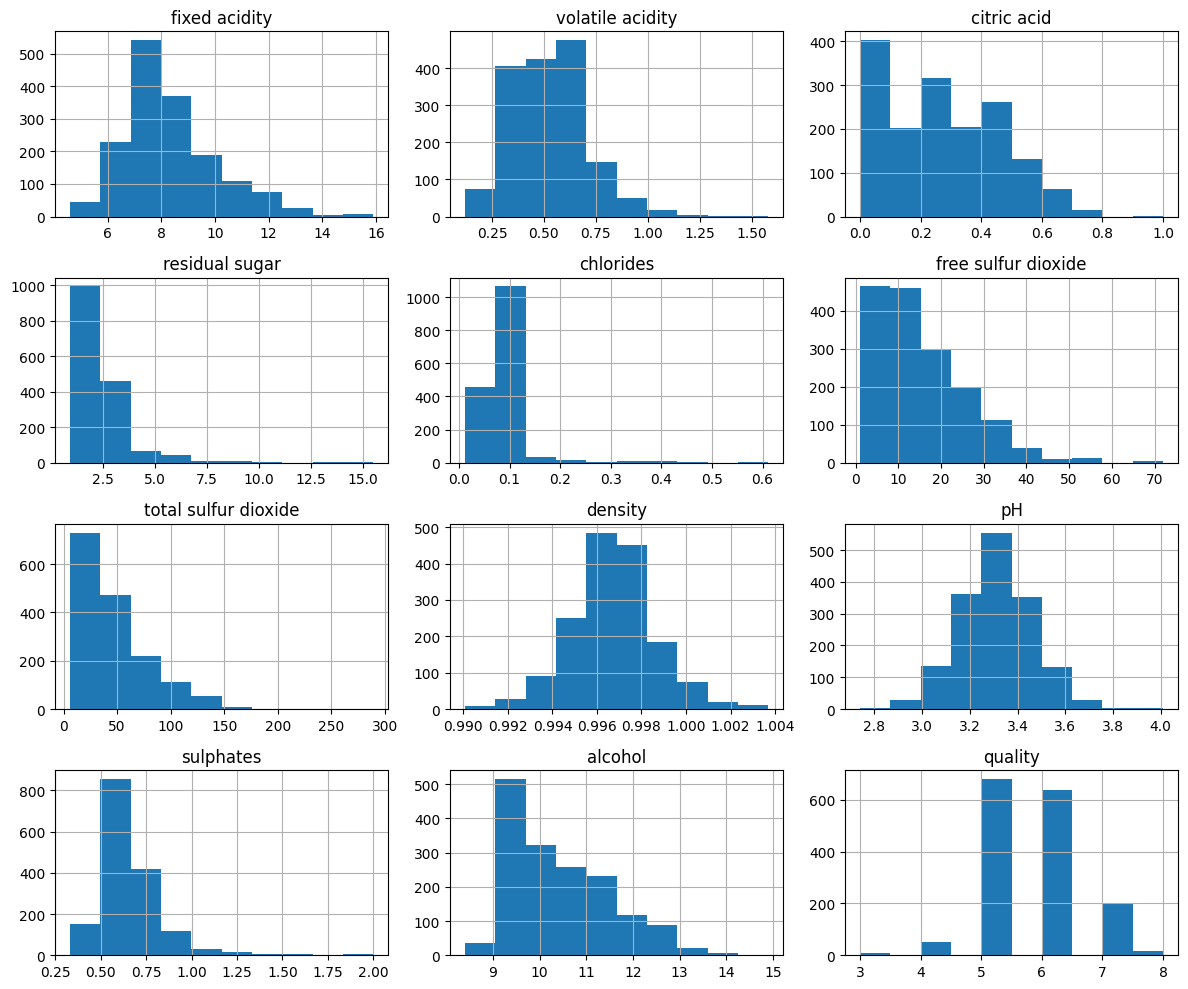

Skewness:
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


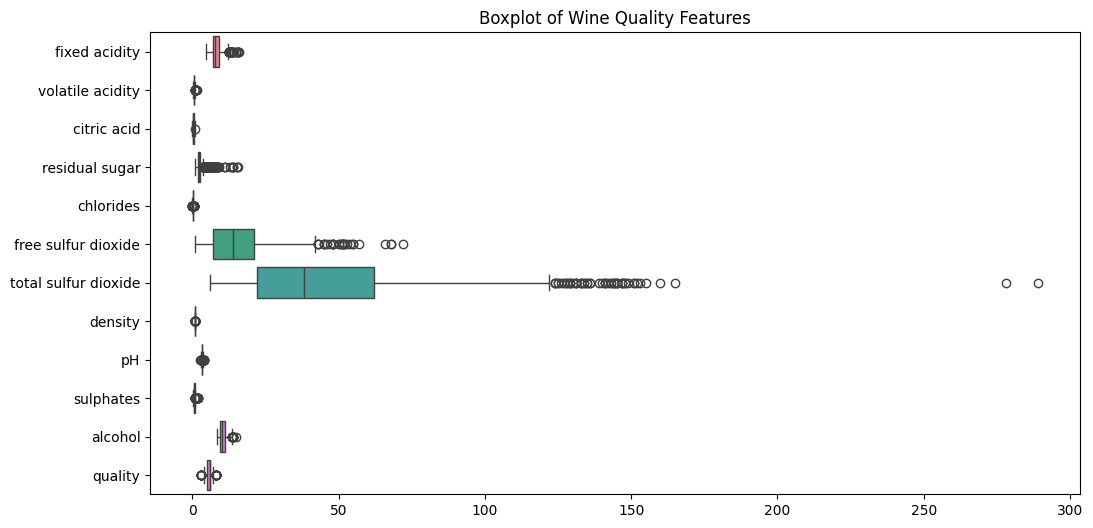

In [2]:
# Q5. Exploratory Data Analysis (EDA) on Wine Quality Dataset
# Let's perform Exploratory Data Analysis on the wine quality dataset to identify the distribution of each feature and determine which feature(s) exhibit non-normality.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the wine quality dataset
wine_data = pd.read_csv('/content/winequality-red eda1.csv')

# Display the first few rows of the dataset
print(wine_data.head())

# Summary statistics
print(wine_data.describe())

# Distribution of each feature
wine_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Check skewness of each feature
skewness = wine_data.skew()
print("Skewness:")
print(skewness)

# Visualize skewness using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=wine_data, orient='h')
plt.title('Boxplot of Wine Quality Features')
plt.show()


# Interpretation:
# Histograms: Histograms are plotted to visualize the distribution of each feature in the wine quality dataset. This helps us identify skewed distributions and potential outliers.

# Skewness: Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. Positive skewness indicates a right-skewed distribution (tail on the right), while negative skewness indicates a left-skewed distribution (tail on the left).

# Boxplots: Boxplots are used to visualize the distribution, skewness, and potential outliers in each feature. Outliers can be identified as points beyond the whiskers of the boxplot.

Number of principal components explaining 90% variance: 7


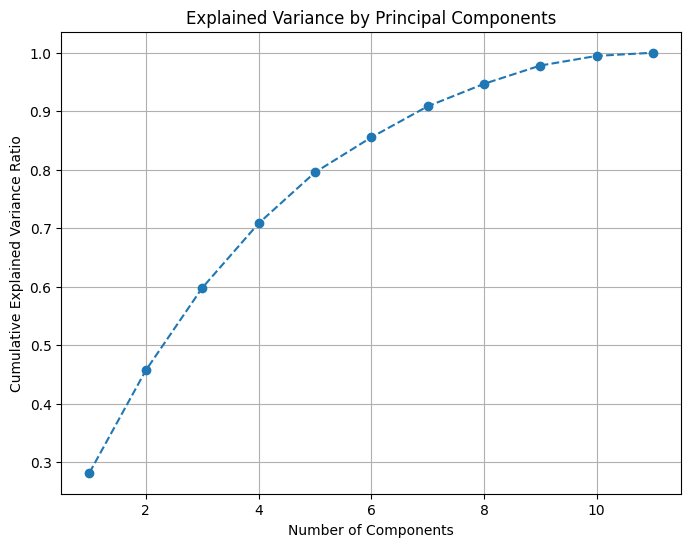

In [3]:
#Q6. Principal Component Analysis (PCA) on Wine Quality Dataset
#Let's perform PCA to reduce the number of features and determine the minimum number of principal components required to explain 90% of the variance in the data

# Separate features (X) and target (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components explaining 90% variance
n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f"Number of principal components explaining 90% variance: {n_components}")

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


# Interpretation:
# Explained Variance Ratio Plot: This plot shows the cumulative explained variance ratio against the number of principal components.
# We look for the number of components where the curve starts to plateau, indicating diminishing returns in explained variance beyond that point.

# Minimum Components for 90% Variance: We determine the minimum number of principal components required to explain at least 90% of the variance in the data.
# This helps in reducing the dimensionality while retaining most of the information in the dataset.